In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Diabetes dataset

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
df = pd.DataFrame(data= load_diabetes().data,columns=load_diabetes().feature_names)

In [4]:
df['target'] = load_diabetes().target

In [5]:
X = df.drop(columns='target')
y = df['target']

In [6]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [7]:
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


## Train Test Split2

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

## Fitting Linear Regression sklearn --> OLS Method

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

print('Coeffecients: ',lr.coef_)
print('Intercept: ',lr.intercept_)

y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

print('RMSE: ',np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print('R2 score: ',np.round(r2_score(y_test,y_pred),2))

Coeffecients:  [  -3.45774513 -244.74742301  473.42705261  367.1454326  -869.09666002
  486.12307597  183.86546993  276.74351786  777.9749957    85.3137622 ]
Intercept:  151.15225686589025
RMSE:  56.13
R2 score:  0.46


In [21]:
X_train.values[0]

array([-0.05273755, -0.04464164, -0.06225218, -0.02632753, -0.00569682,
       -0.00507166,  0.03023191, -0.03949338, -0.03074792, -0.07149352])

## Create Batch Gradient Descent from scratch

In [72]:
import random
class MiniBatchGD:
           
    def __init__(self,rate=0.05,epochs=100,batch_size = 50):
        
        self.rate = rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.coef = None
        self.intercept = None
        self.loss_list = None
        
    def fit(self, X, y):
        
#         initialising
        self.intercept = 0
        self.coef = np.ones(X.shape[1])
        self.loss_list = []

        for _ in range(self.epochs):
            
            # Shuffle data indices only once per epoch
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)

            # Split data into batches
            for start in range(0, len(indices), self.batch_size):
                end = start + self.batch_size
                batch_indices = indices[start:end]
                X_batch = X.values[batch_indices]
                y_batch = y.values[batch_indices]

                # Compute predictions
                y_hat = np.dot(X_batch, self.coef) + self.intercept

                # Compute gradients
                loss_slope_intercept = -2 * np.mean(y_batch - y_hat)
                loss_slope_coef = -2 * np.dot((y_batch - y_hat), X_batch) / X_batch.shape[0]

                # Update parameters
                self.intercept -= self.rate * loss_slope_intercept
                self.coef -= self.rate * loss_slope_coef

            # Compute loss for entire dataset after each epoch
            y_pred = np.dot(X, self.coef) + self.intercept
            self.loss_list.append(np.mean(np.square(y - y_pred)))
        
        
    def predict(self,X):
        return np.dot(X,self.coef) + self.intercept
    

In [73]:
model = MiniBatchGD(rate = 0.2,epochs=200,batch_size=20)

In [74]:
start = time.time()
model.fit(X_train,y_train)
print('Time taken: ',time.time() - start)

Time taken:  0.2067413330078125


In [75]:
print('Coeffeceints: ',model.coef)
print('Intercept',model.intercept)

Coeffeceints:  [   3.23980908 -213.31340401  467.44214468  356.456195    -52.77814212
 -128.32064602 -203.01996301  138.68507022  430.58614921  117.30671952]
Intercept 155.4460684701118


In [76]:
model.loss_list[::100]

[5703.486488037999, 2865.4904631197037]

In [77]:
y_pred2 = model.predict(X_test)
print(r2_score(y_test,y_pred2))

(2629.7913572940342, 10000.0)

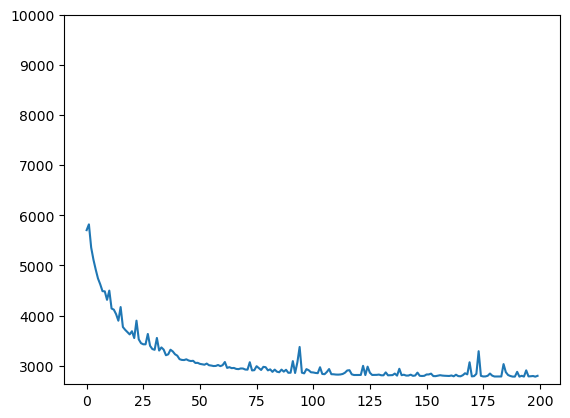

In [79]:
plt.plot(range(len(model.loss_list)),model.loss_list)
# plt.xlim([1000,2000])
plt.ylim(top = 10000)

## Effect of Learning rate on convergence of loss function

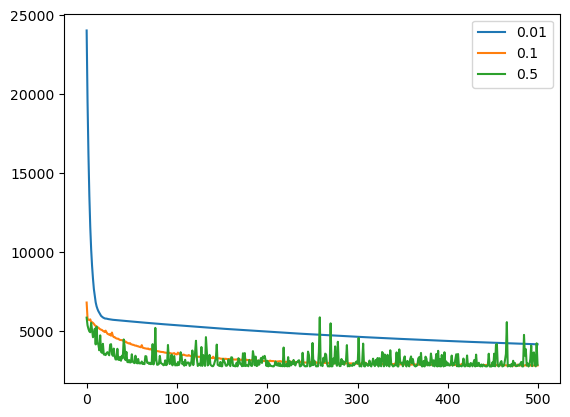

In [80]:
for l in [0.01,.1,.5]:
    model = MiniBatchGD(rate = l,epochs = 500)
    model.fit(X_train,y_train)
    
    plt.plot(range(len(model.loss_list)),model.loss_list,label = l)
    
plt.legend()    

### Here we see that it becomes unstable for high learning rate

## Special Case: Stochastic Gradient Descent

In [88]:
model = MiniBatchGD(rate = 0.2,epochs=200,batch_size=1)
start = time.time()
model.fit(X_train,y_train)
print('Time taken: ',time.time() - start)

Time taken:  2.5085127353668213


In [89]:
y_pred2 = model.predict(X_test)
print(r2_score(y_test,y_pred2))

0.10466703054147619


(2444.652180287677, 10000.0)

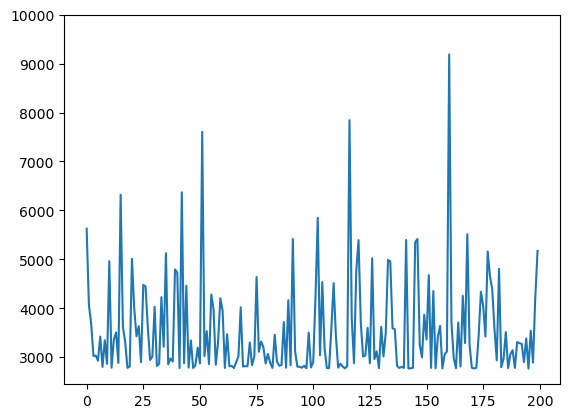

In [90]:
plt.plot(range(len(model.loss_list)),model.loss_list)
# plt.xlim([1000,2000])
plt.ylim(top = 10000)

## Effect of batch size

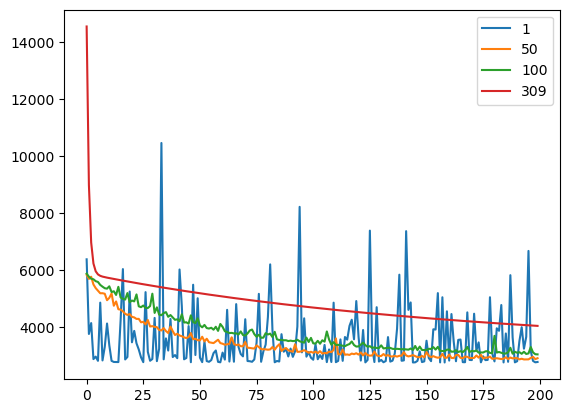

In [91]:
for l in [1,50,100,X_train.shape[0]]:
    model = MiniBatchGD(rate = 0.2,epochs = 200,batch_size=l)
    model.fit(X_train,y_train)
    
    plt.plot(range(len(model.loss_list)),model.loss_list,label = l)
    
plt.legend()   

# Conclusion:
We see that Batch Gradient Descent converges slowly taking high nos of epochs.  
On the other end of the spectrum, with Stochastic Gradient descent(batch size = 1), the loss function is unstable.  
Batch Gradient Descent with Batch size of 50 converges quicker and also quite stable

In [25]:
# import random
# random.sample(range(X.shape[0]),10)

[136, 132, 187, 219, 424, 355, 261, 88, 232, 249]